In [9]:
import pandas as pd

In [20]:
data = pd.read_pickle('dtm.pkl')
data = data.transpose()
data.head()

,The Wolf of Wallstreet,0
aazzen,1,1
abandoned,1,1
abathroom,1,1
abazookaright,1,1
abby,1,1


In [15]:
# Find top 30 words
top_dict = {}
for c in data.columns:
    top = data[c].sort_values(ascending=False).head(30)
    top_dict[c] = list(zip(top.index, top.values))

top_dict

{'The Wolf of Wallstreet': [('jordan', 667),
  ('donnie', 157),
  ('wall', 157),
  ('day', 156),
  ('int', 156),
  ('street', 150),
  ('naomi', 145),
  ('wolf', 142),
  ('revised', 140),
  ('buff', 140),
  ('pages', 138),
  ('page', 84),
  ('like', 83),
  ('cont', 75),
  ('stratton', 66),
  ('fucking', 57),
  ('night', 54),
  ('oakmont', 52),
  ('just', 52),
  ('don', 49),
  ('summer', 49),
  ('denham', 49),
  ('looks', 46),
  ('brokers', 46),
  ('ll', 45),
  ('ext', 43),
  ('office', 43),
  ('know', 43),
  ('got', 43),
  ('fuck', 42)],
 0: [('jordan', 667),
  ('donnie', 157),
  ('wall', 157),
  ('day', 156),
  ('int', 156),
  ('street', 150),
  ('naomi', 145),
  ('wolf', 142),
  ('revised', 140),
  ('buff', 140),
  ('pages', 138),
  ('page', 84),
  ('like', 83),
  ('cont', 75),
  ('stratton', 66),
  ('fucking', 57),
  ('night', 54),
  ('oakmont', 52),
  ('just', 52),
  ('don', 49),
  ('summer', 49),
  ('denham', 49),
  ('looks', 46),
  ('brokers', 46),
  ('ll', 45),
  ('ext', 43),
  (

In [28]:
from wordcloud import WordCloud

wc = WordCloud(background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)

data_clean = pd.read_pickle('data_df.pkl')

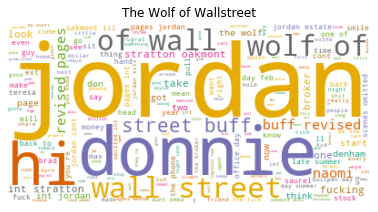

In [37]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [30,15]
movie_names = ['The Wolf of Wallstreet']
wc.generate(data_clean.transcript[0])
    
plt.subplot(3,4, index+1)
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title(movie_names[0])
    
plt.show()

In [40]:
data_bad_words = data.transpose()[['fucking', 'fuck', 'shit']]
data_profanity = pd.concat([data_bad_words.fucking + data_bad_words.fuck, data_bad_words.shit], axis=1)
data_profanity.columns = ['f_word', 's_word']
data_profanity

,f_word,s_word
The Wolf of Wallstreet,99,18
0,99,18


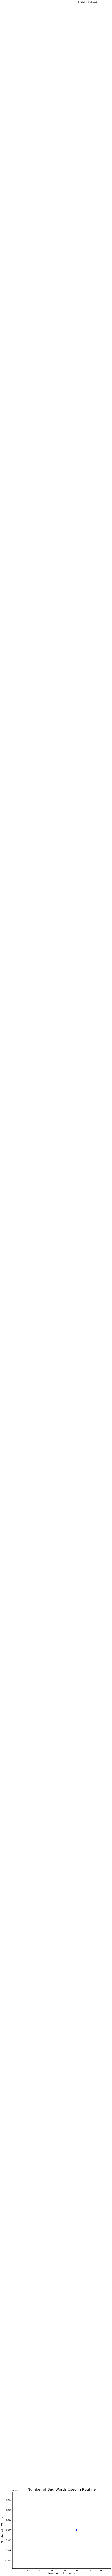

In [47]:
# Let's create a scatter plot of our findings
plt.rcParams['figure.figsize'] = [10, 8]

x = data_profanity.f_word.loc[movie]
y = data_profanity.s_word.loc[movie]
plt.scatter(x, y, color='blue')
plt.text(x+1.5, y+0.5, movie_names[0], fontsize=10)
plt.xlim(-5, 155) 
    
plt.title('Number of Bad Words Used in Routine', fontsize=20)
plt.xlabel('Number of F Bombs', fontsize=15)
plt.ylabel('Number of S Words', fontsize=15)

plt.show()